# COGS108 - TEAM 075: Final Project 

# 1) Overview
Today, we live in a society where airplanes are becoming one of the most essential transportation. However, as the increase in airplane usage, airplane delay has become a more serious problem that has caused many people inconveniences. For our project, we will focus on airliner delays, inspect some of the most influential causes that have led to flight delays and predict the potential aspects that people overlook. With our data analysis, we hope to give some insights to airlines that could potentially decrease airplane delays.

# 2) Team Info
##  2.1) Team Name: The Triton Pride
##  2.2) Team Acronym: TTP

## 2.3) Group Members and Positions
Bowen (Yaxin) Shi - Data Gathering and Visualization & Background<br>
Siqi Chen - Data Gathering and Analysis  & conclusion<br>
Lily Moon - Data Gathering and Analysis & conclusion<br>
Shunqi Lei - Data Analysis & Conclusion & Ethics and Privacy<br>
Ruoxuan Li - Data Analysis & Conclusion & Ethics and Privacy<br>

## 2.4) Group Members IDs
Bowen Shi (A15754011) <br>
Siqi Chen (A13305633)<br>
Lily Moon (A15742638)<br>
Shunqi Lei (A13595074)<br>
Ruoxuan Li (A13874395)<br>

# 3) Research Question
Our project is going to inspect some of the primary causes that led to airliner delays, analyse these causes, and predict some potential reasons that caused theses. <br><br>
What could be some of the potential reasons that led to airliner delays causes? 

# 4) Background and Prior Work
While searching for our dataset, we actually found two prior projects regarding a similar topic.Both projects are on Kaggle. One is called Airline Delay and Cancellation Data 2018 by Milan Tomin. In Tomin’s project, he analyzes the data set for 2009-2018 U.S. airline delays. His work is more informative as he mainly just cleans the data for airline delays and cancellations from 2009 to 2018. His graphs of delays by airlines and cities gave us insights on preparing our hypothesis. He indicates American Airlines has the second most delay hours following Southeast Airlines. Using this information, we predict that airlines that charge extra fees would have less delays since Southwest usually have cheap overall price. However, this is just a prediction, we will be using our data set to either prove or disprove This hypothesis.
<br><br>
In Predicting Flight Delays by Fabien Daniel, he develops three models that aims to predict flight delays at take-off. The first model is “one airline, one airport,” where he used “Polynomial degree” to predict and verify his hypothesis. The second model is “One airline, all airports,” where he used “Linear and polynomial regression” to support his hypothesis. The third model he used is “Accounting for destinations,”  where he used regression with regularization to predict airline delays. Using his idea, we will be using P value from OLS regression results to support our hypothesis.
<br><br>
Furthermore, we found a website that shows the delay information by cities on a map. From this website, we learned that bigger cities have more airports. Looking at this map, we predict that those cities would have more demand for airliner usage and delays would cause greater impacts. Hence, we came up with the prediction that smaller cities or cities with less population would have more delays.
<br><br>
References: 
- Kaggle(Airline Delay and Cancellation Data 2018)https://www.kaggle.com/milantomin/airline-delay-and-cancellation-data-2018 <br>
- Kaggle(Predicting flight delays [Tutorial])https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial?fbclid=IwAR11yY89b6l2RbGxm3fsMm9gcmenLpH6bqXJwPYDNvdp1F2S2FkxqIPDDn0 <br>
- Federal Aviation Administration (Flight Delay Information)https://www.fly.faa.gov/flyfaa/usmap.jsp <br>
- Southwest Baggage https://www.southwest.com/html/customer-service/baggage/checked-bags-pol.html

# 5) Hypothesis
- Airlines charging extra money on checked luggage or other fees  may have fewer delays since it may decrease the likelihood of passengers bringing checked luggage with them and hence, there are fewer procedures airport staffs have to do before planes take off
<br>
<br>
- Airports with less human population or density may have more delays since lower population means local airport staff would have less experience and they would also have less fundings since less people are going to utilize those airports. 

# 6) Dataset(s)

## 6.1) Airline Delay Data

- Dataset Name: 119755657_T_ONTIME_REPORTING.csv, L_AIRPORT.csv_, L_STATE_ABR_AVIATION.csv_, L_UNIQUE_CARRIERS.csv_
- Number of observations: 583,986
- Description: 119755657_T_ONTIME_REPORTING.csv contains primary information we are going to use to support our hypothesis. L_AIRPORT.csv_, L_STATE_ABR_AVIATION.csv_, and L_UNIQUE_CARRIERS.csv_ contain the unique code that corresponds to airport, state, and airline carriers in 119755657_T_ONTIME_REPORTING.csv.
- Link to the dataset: https://www.transtats.bts.gov/DL_SelectFields.asp?DB_Short_Name=On-Time&Table_ID=236&fbclid=IwAR2OTDbY76FUeZIPycOLBoJ3os-Y3WUmmXwyv_dxX4iy8Ny0YZTfXdxPC3s

## 6.2) Airline Baggage Fee Data

- Dataset Name: airlinefee.csv
- Number of observations: 17
- Description: airlinefee.csv contains information about airline fees. 
- Link to the dataset: https://thepointsguy.com/news/these-airlines-charge-the-most-extra-fees/ and airline companies' websites.

## 6.3) Cities Population Ranking Density Data
- Dataset Name: uscities.csv
- Number of observations: 28,889
- Description: uscities.csv contains information about US cities and their populations. 
- Link to the dataset: https://simplemaps.com/data/us-cities

# 7) Setup

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats

# PLOT POPULATION
%matplotlib inline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats

# 8) Data Cleaning
Data files: 
- 119755657_T_ONTIME_REPORTING.csv, 
- L_AIRPORT.csv_, 
- L_STATE_ABR_AVIATION.csv_, 
- L_UNIQUE_CARRIERS.csv_
- uscities.csv
- airlinefee.csv

## 8.1) Checking data completion 


First, we want to check if our primary dataset's completion rate. 

In [2]:
# import our dataset 
df = pd.read_csv('119755657_T_ONTIME_REPORTING.csv')
df = df.drop(['Unnamed: 22'], axis = 1)
# checking if we are missing any data
completion_check_df = df.isnull().sum(axis=0).reset_index()
completion_check_df.columns = ['Variables', '# of Missing']
completion_check_df['Completion (%)']=(df.shape[0]-completion_check_df['# of Missing'])/df.shape[0]*100
completion_check_df.sort_values('Completion (%)').reset_index(drop = True)

#print our completion chart
completion_check_df

,Variables,# of Missing,Completion (%)
0,FL_DATE,0,100.000000
1,OP_UNIQUE_CARRIER,0,100.000000
2,ORIGIN,0,100.000000
3,ORIGIN_CITY_NAME,0,100.000000
4,ORIGIN_STATE_ABR,0,100.000000
5,ORIGIN_STATE_NM,0,100.000000
6,DEST,0,100.000000
7,DEST_CITY_NAME,0,100.000000
8,DEST_STATE_ABR,0,100.000000
9,DEST_STATE_NM,0,100.000000


As we can see, we have everything we need and there are 47,863 datasets we can use for existed delays issues. 

## 8.2) Data cleaning for delay causes 

Now we have a completion chart, we want to extract useful data to support our hypotheses. <br>
Let's start with delay causes.<br>
Hence, we are deleting all the delays that is NaN and dropping all the unuseful columns. <br>
Then, we store the new dataset in a new dataframe.

In [3]:
df_delay_causes = df.loc[(~df['CARRIER_DELAY'].isna()) | 
                         (~df['WEATHER_DELAY'].isna()) |
                         (~df['NAS_DELAY'].isna()) |
                         (~df['SECURITY_DELAY'].isna()) |
                         (~df['LATE_AIRCRAFT_DELAY'].isna())]
df_delay_causes = df_delay_causes.reset_index(drop=True)

df_causes_only = df_delay_causes.drop(['FL_DATE', 
                                      'OP_UNIQUE_CARRIER',
                                      'ORIGIN',
                                      'ORIGIN_CITY_NAME',
                                      'ORIGIN_STATE_ABR',
                                      'ORIGIN_STATE_NM',
                                      'DEST',
                                      'DEST_CITY_NAME',
                                      'DEST_STATE_ABR',
                                      'DEST_STATE_NM',
                                      'DEP_DELAY_NEW',
                                      'CRS_ARR_TIME',
                                      'ARR_TIME',
                                      'ARR_DELAY_NEW',
                                      'DISTANCE', 
                                      'CRS_DEP_TIME',
                                      'DEP_TIME'], axis=1)

df_causes_only

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,155.0,0.0,0.0,0.0,48.0
1,0.0,0.0,32.0,0.0,0.0
2,0.0,0.0,18.0,0.0,0.0
3,29.0,0.0,0.0,0.0,0.0
4,0.0,0.0,29.0,0.0,0.0
...,...,...,...,...,...
105217,31.0,0.0,0.0,0.0,0.0
105218,35.0,0.0,0.0,0.0,0.0
105219,0.0,27.0,73.0,0.0,90.0
105220,0.0,15.0,0.0,0.0,0.0


As we can see, there are 105222 rows but only five causes. <br>
For the purpose of analyzing delay causes, we want the average of each cause. 
Hence: 

In [4]:
carrier_delay_avg = (sum(df_causes_only.loc[:, 'CARRIER_DELAY'])) / (len(df_causes_only))
weather_delay_avg = (sum(df_causes_only.loc[:, 'WEATHER_DELAY'])) / (len(df_causes_only))
nas_delay_avg = (sum(df_causes_only.loc[:, 'NAS_DELAY'])) / (len(df_causes_only))
security_delay_avg = (sum(df_causes_only.loc[:, 'SECURITY_DELAY'])) / (len(df_causes_only))
late_aircraft_delay_avg = (sum(df_causes_only.loc[:, 'LATE_AIRCRAFT_DELAY'])) / (len(df_causes_only))

myDict_causes = {"late_aircraft_delay_avg" : late_aircraft_delay_avg,
          "carrier_delay_avg" : carrier_delay_avg,
          "weather_delay_avg" : weather_delay_avg,
          "nas_delay_avg" : nas_delay_avg,
          "security_delay_avg" : security_delay_avg}

myDict_causes

{'late_aircraft_delay_avg': 24.950590180760678,
 'carrier_delay_avg': 20.10608047746669,
 'weather_delay_avg': 4.428551063465815,
 'nas_delay_avg': 18.508391781186443,
 'security_delay_avg': 0.07950808766227595}

## 8.3) Data cleaning for airlines

Now we have everything we need to for delay causes, we can move on to the airline data clean up. <br>
Let's first drop all columns we do not need.

In [5]:
df_airlines_only = df.drop(['FL_DATE', 
                            'ORIGIN',
                            'ORIGIN_CITY_NAME',
                            'ORIGIN_STATE_ABR',
                            'ORIGIN_STATE_NM',
                            'DEST',
                            'DEST_CITY_NAME',
                            'DEST_STATE_ABR',
                            'DEST_STATE_NM',
                            'DISTANCE', 
                            'CARRIER_DELAY',
                            'WEATHER_DELAY',
                            'NAS_DELAY',
                            'SECURITY_DELAY',
                            'LATE_AIRCRAFT_DELAY',
                            'CRS_DEP_TIME',
                            'DEP_TIME',
                            'CRS_ARR_TIME',
                            'ARR_TIME'], axis=1)

df_airlines_only

,OP_UNIQUE_CARRIER,DEP_DELAY_NEW,ARR_DELAY_NEW
0,9E,33.0,8.0
1,9E,8.0,0.0
2,9E,0.0,0.0
3,9E,10.0,0.0
4,9E,0.0,0.0
...,...,...,...
583980,UA,0.0,0.0
583981,UA,0.0,0.0
583982,UA,0.0,0.0
583983,UA,0.0,0.0


As we can see, we have 583,985 observations but we want to order them by their airline. <br>
Hence, let's merge data for the same airline and take the average. 

In [6]:
df_airlines_only = df_airlines_only.groupby(by='OP_UNIQUE_CARRIER').agg({'DEP_DELAY_NEW': 'mean',
                                                      'ARR_DELAY_NEW': 'mean'}).reset_index()
df_airlines_only

,OP_UNIQUE_CARRIER,DEP_DELAY_NEW,ARR_DELAY_NEW
0,9E,15.956522,16.518793
1,AA,11.047137,11.847480
2,AS,9.479610,10.895516
3,B6,24.144074,24.069630
4,DL,10.091902,9.901339
5,EV,20.133192,21.970000
6,F9,16.946986,16.638356
7,G4,14.872990,16.736032
8,HA,5.024444,6.166249
9,MQ,12.980807,15.577098


Here, we have 16 unique airlines we can use for our analysis. <br>
We want to match each unique id to its corresponding airline name.

In [7]:
df_airline_unique = pd.read_csv('L_UNIQUE_CARRIERS.csv_')

if df_airlines_only.columns[0] == 'OP_UNIQUE_CARRIER':
    for i in range(0, len(df_airlines_only)):
        description_temp = df_airline_unique.loc[df_airline_unique['Code'] == df_airlines_only.iloc[i]['OP_UNIQUE_CARRIER']]
        df_airlines_only.at[i, 'OP_UNIQUE_CARRIER'] = description_temp['Description'].values[0]
    
    df_airlines_only.rename(columns={'OP_UNIQUE_CARRIER':'AIRLINE',
                                     'DEP_DELAY_NEW':'DEP_DELAY_AVG',
                                     'ARR_DELAY_NEW':'ARR_DELAY_AVG'}, 
                            inplace=True)

df_airlines_only

,AIRLINE,DEP_DELAY_AVG,ARR_DELAY_AVG
0,Endeavor Air Inc.,15.956522,16.518793
1,American Airlines Inc.,11.047137,11.847480
2,Alaska Airlines Inc.,9.479610,10.895516
3,JetBlue Airways,24.144074,24.069630
4,Delta Air Lines Inc.,10.091902,9.901339
5,ExpressJet Airlines LLC,20.133192,21.970000
6,Frontier Airlines Inc.,16.946986,16.638356
7,Allegiant Air,14.872990,16.736032
8,Hawaiian Airlines Inc.,5.024444,6.166249
9,Envoy Air,12.980807,15.577098


## 8.4) Data cleaning for cities

Now we want to do the same for cities and store their averages. <br>
First we extract departing and arriving data from the original dataset. <br>
Then we merge them together to obtain a new dataset that contains the average delay for each city.

In [8]:
df_cities_only = df.drop(['FL_DATE', 
                        'OP_UNIQUE_CARRIER',
                        'CRS_ARR_TIME',
                        'ARR_TIME',
                        'DISTANCE', 
                        'CRS_DEP_TIME',
                        'DEP_TIME',
                        'CARRIER_DELAY',
                        'WEATHER_DELAY',
                        'NAS_DELAY',
                        'SECURITY_DELAY',
                        'LATE_AIRCRAFT_DELAY',
                        'ORIGIN',
                        'ORIGIN_STATE_ABR',
                        'ORIGIN_STATE_NM',
                        'DEST',
                        'DEST_STATE_ABR',
                        'DEST_STATE_NM'], axis=1)

df_departing_delays = df_cities_only.groupby(by='ORIGIN_CITY_NAME').agg({'DEP_DELAY_NEW': 'mean'}).reset_index()
df_arriving_delays = df_cities_only.groupby(by='DEST_CITY_NAME').agg({'ARR_DELAY_NEW': 'mean'}).reset_index()

df_departing_delays.rename(columns={'ORIGIN_CITY_NAME':'Cities',
                                   'DEP_DELAY_NEW':'DELAY_AVG'}, 
                        inplace=True)

df_arriving_delays.rename(columns={'DEST_CITY_NAME':'Cities',
                                   'ARR_DELAY_NEW':'DELAY_AVG'}, 
                        inplace=True)

df_cities_avg = pd.concat([df_departing_delays, df_arriving_delays])

df_cities_avg = df_cities_avg.groupby(by='Cities').agg({'DELAY_AVG': 'mean'}).reset_index()

df_cities_avg

,Cities,DELAY_AVG
0,"Aberdeen, SD",19.658333
1,"Abilene, TX",9.020833
2,"Adak Island, AK",4.944444
3,"Aguadilla, PR",16.028760
4,"Akron, OH",16.261649
...,...,...
335,"Wilmington, NC",9.706481
336,"Worcester, MA",23.323864
337,"Wrangell, AK",17.356003
338,"Yakutat, AK",13.317324


As we can see, there are 340 cities we can use for our analysis. 

## 8.5) Data cleaning for US cities

In [9]:
pop = pd.read_csv('uscities.csv')

For US cities, We are going to factor out the common names of cities and stored data in the new column, named 'Cities.' Then sorted city names in acending order and dropped any columns will not be used.

In [10]:
pop['Cities'] = pop['city']+', '+pop['state_id']
pop = pop.sort_values(by=['Cities'])
pop

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id,Cities
10200,Aaronsburg,Aaronsburg,PA,Pennsylvania,42027,Centre,42027,Centre,40.9042,-77.4513,533.0,231.0,polygon,False,False,America/New_York,3,16820,1840109056,"Aaronsburg, PA"
14843,Abanda,Abanda,AL,Alabama,1017,Chambers,01017,Chambers,33.0926,-85.5253,174.0,22.0,polygon,False,False,America/Chicago,3,36276,1840114192,"Abanda, AL"
14498,Abbeville,Abbeville,AL,Alabama,1067,Henry,01067,Henry,31.5664,-85.2528,2567.0,63.0,polygon,False,True,America/Chicago,3,36310,1840004304,"Abbeville, AL"
17054,Abbeville,Abbeville,GA,Georgia,13315,Wilcox,13315,Wilcox,31.9925,-83.3068,2789.0,352.0,polygon,False,True,America/New_York,3,31001,1840016326,"Abbeville, GA"
5910,Abbeville,Abbeville,LA,Louisiana,22113,Vermilion,22113,Vermilion,29.9750,-92.1266,19848.0,783.0,polygon,False,True,America/Chicago,3,70510 70511,1840105400,"Abbeville, LA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24397,Zumbrota,Zumbrota,MN,Minnesota,27049,Goodhue,27049,Goodhue,44.2950,-92.6734,3314.0,481.0,polygon,False,True,America/Chicago,3,55992,1840043185,"Zumbrota, MN"
3725,Zuni Pueblo,Zuni Pueblo,NM,New Mexico,35031,McKinley,35031,McKinley,35.0708,-108.8484,7532.0,328.0,polygon,False,False,America/Denver,3,87327,1840113485,"Zuni Pueblo, NM"
26213,Zurich,Zurich,KS,Kansas,20163,Rooks,20163,Rooks,39.2323,-99.4346,95.0,203.0,polygon,False,True,America/Chicago,3,67663,1840026909,"Zurich, KS"
18342,Zwingle,Zwingle,IA,Iowa,19061,Dubuque,19061|19097,Dubuque|Jackson,42.2972,-90.6874,92.0,217.0,polygon,False,True,America/Chicago,3,52079,1840026219,"Zwingle, IA"


The column 'density' represents the density of population per kilometers, and the column 'ranking' have measured with an integer from 1 to 5 that captures the importance of a city. 1 is the most important, 5 is the least important.

In [11]:
pop_fac = pd.merge(pop, df_cities_avg, on=['Cities'], how='inner')
pop_fac_fin = pop_fac[['Cities','population','density','ranking','DELAY_AVG']]
pop_fac_fin

,Cities,population,density,ranking,DELAY_AVG
0,"Aberdeen, SD",28264.0,683.0,3,19.658333
1,"Abilene, TX",114964.0,441.0,2,9.020833
2,"Aguadilla, PR",11581.0,1784.0,3,16.028760
3,"Akron, OH",565920.0,1233.0,2,16.261649
4,"Albany, GA",90515.0,513.0,3,7.530120
...,...,...,...,...,...
283,"Wilmington, NC",245910.0,889.0,2,9.706481
284,"Worcester, MA",498997.0,1918.0,2,23.323864
285,"Wrangell, AK",2521.0,0.0,3,17.356003
286,"Yakutat, AK",653.0,2.0,3,13.317324


There are 288 cities we can use to match with the delays files.

## 8.6) Data cleaning for airline fees

Let's first read the airline fee file.

In [12]:
df_fees = pd.read_csv("airlinefee.csv")
df_fees

,Airline,First_Fees,Second_Fees
0,Endeavor Air Inc.,25,40
1,American Airlines Inc.,25,40
2,Alaska Airlines Inc.,25,40
3,JetBlue Airways,30,40
4,Delta Air Lines Inc.,30,40
5,ExpressJet Airlines LLC,25,35
6,Frontier Airlines Inc.,30,45
7,Allegiant Air,50,50
8,Hawaiian Airlines Inc.,30,40
9,Envoy Air,25,35


Here, we are going to merge baggage fees with delay information, departure delays, arrival delays, and average delays. 

In [13]:
df_fees.rename(columns = {'Airline':'AIRLINE'}, inplace = True) 
df_fees_and_delays = pd.merge(left=df_airlines_only,right=df_fees, on = 'AIRLINE')
df_fees_and_delays['AVG_DELAY'] = (df_fees_and_delays['DEP_DELAY_AVG']+df_fees_and_delays['ARR_DELAY_AVG'])/2
df_fees_and_delays

,AIRLINE,DEP_DELAY_AVG,ARR_DELAY_AVG,First_Fees,Second_Fees,AVG_DELAY
0,Endeavor Air Inc.,15.956522,16.518793,25,40,16.237657
1,American Airlines Inc.,11.047137,11.847480,25,40,11.447308
2,Alaska Airlines Inc.,9.479610,10.895516,25,40,10.187563
3,JetBlue Airways,24.144074,24.069630,30,40,24.106852
4,Delta Air Lines Inc.,10.091902,9.901339,30,40,9.996621
5,ExpressJet Airlines LLC,20.133192,21.970000,25,35,21.051596
6,Frontier Airlines Inc.,16.946986,16.638356,30,45,16.792671
7,Allegiant Air,14.872990,16.736032,50,50,15.804511
8,Hawaiian Airlines Inc.,5.024444,6.166249,30,40,5.595347
9,Envoy Air,12.980807,15.577098,25,35,14.278953


As we can see, there are 17 observations we can use for our analysis. Although there aren’t that many dataset we can use for this part of analysis. We will work with what we have and keep data consistency and up to date as we are only taking data for 2019. Hence, let’s leave the table as it is right now. 

# 9) Data Visualization

In the Data Visualization part, we are going to visualize the data we cleaned in the previous step. Then, we are going to create graphical representation of information and data and inspect them. Furthermore, it will help us prepare our analysis and give us insights on different approaches. 

## 9.1) Visualize delay causes

Let's first visualize the data we have for delay causes

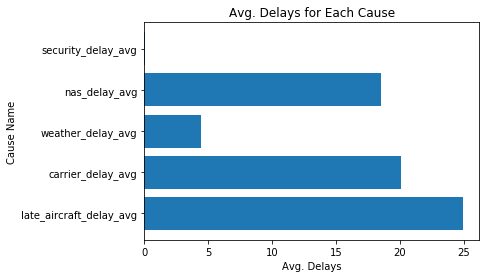

In [14]:
y_pos = np.arange(len(myDict_causes.keys()))
plt.barh(y_pos, myDict_causes.values())
plt.yticks(y_pos, myDict_causes.keys())
plt.title('Avg. Delays for Each Cause')
plt.xlabel('Avg. Delays')
plt.ylabel('Cause Name')
plt.show()

As we can see from the above bar graph, the most influential cause for flight delays is late aircraft delay. Hence, we know that aircraft delays are like the domino effect where if one gets delayed then multiple would also get delayed using the same terminal. Furthermore, we can now move on to analyzation part of our project where we will prove or disprove airports with denser population and airlines charge more extra fees would have more flight delays. But before we do that, let’s first visualize the cleaned data we have for delays vs. baggage fees and delays vs. populations. 

## 9.2) Visualize delays vs. baggage fees

First, let's visualize the scatter plot between each pair of our parameters, that is, DEP_DELAY_AVG, ARR_DELAY_AVG, First_Fees, Second_Fees, AVG_DELAY

Text(0.5, 0.98, 'delays vs baggage fees')

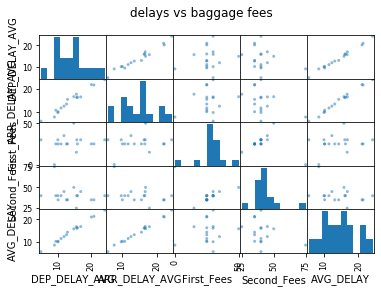

In [15]:
fig = pd.plotting.scatter_matrix(df_fees_and_delays)
plt.suptitle('delays vs baggage fees', fontsize=12)

As we can see, there is a clear difference between first checked baggage fee and second checked baggage fee. Hence, let’s further visualize each.

Let’s first look at the relation between delays and first checked baggage fees.

Text(0, 0.5, 'Delays')

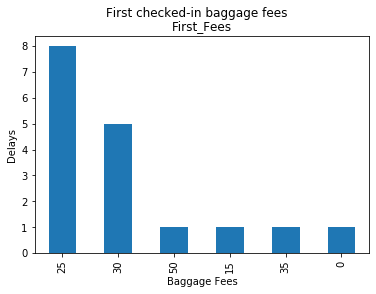

In [16]:
baggage_fees = df_fees['First_Fees'].value_counts()
baggage_fees.plot.bar(title='First checked-in baggage fees', subplots=True)
plt.xlabel('Baggage Fees')
plt.ylabel('Delays')

As we can see, the most delays occur when airlines charge $25 for the first baggage. It seems like there is no relation between the first baggage fees and delays. However, we are not 100% sure about this. Hence, we cannot conclude anything from the above bar graph.

Let’s first look at the relation between delays and second checked baggage fees.

Text(0, 0.5, 'Delays')

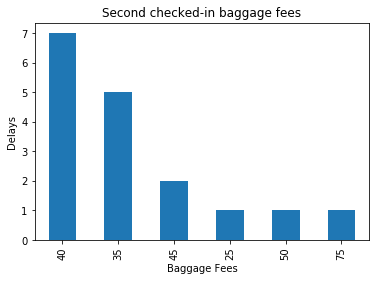

In [17]:
Sbaggage_fees = df_fees['Second_Fees'].value_counts()
Sbaggage_fees.plot.bar(title='Second checked-in baggage fees')
plt.xlabel('Baggage Fees')
plt.ylabel('Delays')

For the second baggage fees, we can see that there exists a relation between baggage fees and average delays. As the increase in baggage fees indicates the increase in delays. However, this is not the case when the price increases to $45. Hence there is no conclusion we can make just from the above bar graphs. We will further analyse the correlation between baggage fees and delays in our analysis part and primary focus on the second baggage fees since the relation seems more obvious. 

## 9.3) Visualize Delays vs. Population

Now, let's visualize average delay time with respect to population

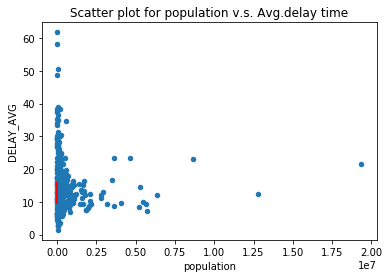

In [18]:
## PLOT POPULATION##
a = pop_fac_fin['population']
b = pop_fac_fin['DELAY_AVG']
a1,b1=np.polyfit(a,b,1)

population = pop_fac_fin['population']

pred_avgdel = a1*population+b1
pop_fac_fin.plot.scatter(title = 'Scatter plot for population v.s. Avg.delay time',x = 'population', y = 'DELAY_AVG')
plt.plot(pred_avgdel,'-',color='red')

From the graph above, we notice that data are clusttered at the lower level of population, and it seems surprise for us that there is no direct relationship between population and average delay time. We will further analyze this outcome in the following section.

# 10) Data Analysis

In the Data Analysis part, we are going to use the cleaned data we obtained from Data Cleaning and build up from the insights we foresee in our visualization. Furthermore, we will either prove or disprove our hypotheses.

Let's first start with Delays vs. Baggage fees. In this part, we will work on the relationship between average delay time and baggage fees. In fact, we will look into first and second baggage fees separately for their effect on average delay time. Our hypothesis is that airline with higher baggage fees will have less flight delays since each airline will provide the service for checked-in bags and higher baggage fees mean more cost spent on this service, which may reflect the cost airlines spent to fly people to their destination. and in this part of data analysis, we will try to find out the validity of our hypothesis. Before data analysis, we firt check the correlation between average delay time and city population.

## 10.1) Part One: Delays vs. Fees

In [19]:
desc=df_fees_and_delays.describe()
desc

,DEP_DELAY_AVG,ARR_DELAY_AVG,First_Fees,Second_Fees,AVG_DELAY
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,13.931790,14.742828,26.470588,40.882353,14.337309
std,4.863200,5.030527,9.805086,10.343370,4.923607
min,5.024444,6.166249,0.000000,25.000000,5.595347
25%,10.163013,10.895516,25.000000,35.000000,10.194029
50%,12.980807,15.577098,25.000000,40.000000,14.278953
75%,15.956522,16.736032,30.000000,40.000000,16.730204
max,24.144074,24.069630,50.000000,75.000000,24.106852


In [20]:
corrs = df_fees_and_delays.corr()
corrs

,DEP_DELAY_AVG,ARR_DELAY_AVG,First_Fees,Second_Fees,AVG_DELAY
DEP_DELAY_AVG,1.000000,0.981234,0.157152,-0.270577,0.995137
ARR_DELAY_AVG,0.981234,1.000000,0.209158,-0.375126,0.995456
First_Fees,0.157152,0.209158,1.000000,-0.260100,0.184462
Second_Fees,-0.270577,-0.375126,-0.260100,1.000000,-0.325265
AVG_DELAY,0.995137,0.995456,0.184462,-0.325265,1.000000


From the table we can see that on the one hand, the correlation between first checked in bag fee and average delay is 0.184462, which shows a slightly positive correlation between the two. on the other hand, the correlation between second checked in bag fee and average delay is -0.325265, which shows a stronger negative correlation between the two. we will make use of OLS model to estimate if second baggage fee is a strong predictor of average airline delays in a linear regression model.

In [21]:
outcome_1, predictors_1 = patsy.dmatrices('AVG_DELAY ~ First_Fees', df_fees_and_delays)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:              AVG_DELAY   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.5284
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.478
Time:                        23:11:43   Log-Likelihood:                -50.411
No. Observations:                  17   AIC:                             104.8
Df Residuals:                      15   BIC:                             106.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8854      3.584      3.316      0.0

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


as we can see, the p-value is 0.478 which is pretty big and we are not able to show that First checked-in baggage fee parameter is significant. (we cannot really rely on asymptotic results since there are only 17 observations for 17 airlines, so it is noted that we have to interpret the results with care.) For the part below, we will make use of OLS model to estimate if second baggage fee is a strong predictor of average airline delays in a linear regression model.

In [22]:
outcome_2, predictors_2 = patsy.dmatrices('AVG_DELAY ~ Second_Fees', df_fees_and_delays)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:              AVG_DELAY   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.775
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.203
Time:                        23:11:43   Log-Likelihood:                -49.755
No. Observations:                  17   AIC:                             103.5
Df Residuals:                      15   BIC:                             105.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      20.6672      4.893      4.224      

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


as we can see, the p-value is 0.203 which is pretty big and we are not able to show that Second checked-in baggage fee parameter is significant but it is more significant than first checked-in baggage fee. For the part below, we will try to fit a line to the datapoints and check to see the number of inliers that support our fitted line.

In [23]:
a1, b1 = np.polyfit(df_fees_and_delays['Second_Fees'], df_fees_and_delays['AVG_DELAY'], 1)
print(a1, b1)

-0.15483127729387147 20.66717589046848


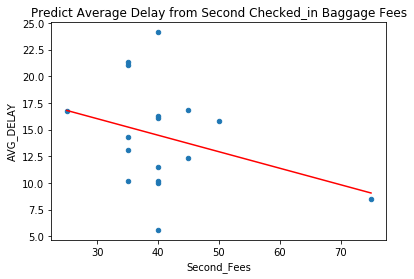

In [24]:
price_min = df_fees_and_delays['Second_Fees'].min()
price_max = df_fees_and_delays['Second_Fees'].max()
price = np.array(range(price_max+1-price_min))+price_min
pred_delay = a1*price+b1
plt.title('Predict Average Delay from Second Checked_in Baggage Fees')
plt.xlabel('Second_Fees')
plt.ylabel('AVG_DELAY')
plt.scatter(df_fees_and_delays['Second_Fees'], df_fees_and_delays['AVG_DELAY'], s=20);
plt.plot(price, pred_delay, c='red')

From the graph, we can see that the line is very loosely fit(very few inliers by which we could assert that there is a relationship between average delay and second fees) to datapoints with x representing second checked-in bag fees and y representing average delay.

## 10.2) Part Two: Delays vs. Population

In this part, we will work on the relationship between average delay time and city population.  Our hypothesis is that airports with less human population or density may have more delays since lower population means local airport staff would have less experience, and they would also have less fundings since less people are going to utilize those airports. 

Before data analysis, we firt check the correlation between average delay time and city population.

### 10.2.1) CORRELATION TABLE

The correlation table below shows that population and density are not really related to the average flight delay. On the other hands, it shows that the ranking of cities affect on average flight delay.

In [25]:
corr = pop_fac_fin.corr()
corr

,population,density,ranking,DELAY_AVG
population,1.000000,0.694342,-0.538001,-0.058887
density,0.694342,1.000000,-0.495767,0.034604
ranking,-0.538001,-0.495767,1.000000,0.211685
DELAY_AVG,-0.058887,0.034604,0.211685,1.000000


### 10.2.2) By Population

Now we approach our analysis from the aspect of the population. Although the correlation table shows that there is no close relationship between population and delay time, we still want to check this result from the scatter plot with predicted line above, and to take a close look at how ranking is connected with the average delay time.

Now we start by visualizing the data through the scatter plot and create an OLS regression model to predict how population will affect the average delay time.

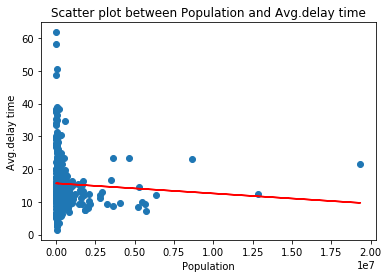

In [26]:
#creating data
x = np.array(pop_fac_fin['population'])
y = np.array(pop_fac_fin['DELAY_AVG'])

#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
def linefitline(b):
    return intercept + slope * b
line1 = linefitline(x)

#plot line
plt.scatter(x,y)
plt.plot(x,line1, c = 'r')
plt.title("Scatter plot between Population and Avg.delay time")
plt.xlabel("Population")
plt.ylabel("Avg.delay time")
plt.show()

Through the graph above, we can observe that city populaion and average delay time are indeed not in a perfect correlation, and the flight delay is focused on cities whose population is small along with the decreasing predict line.

Now we will analyize the data from the summary of data fitting.

In [27]:
## TO FIND P VALUE##

out, pred = patsy.dmatrices('DELAY_AVG~population',pop_fac_fin)
mod = sm.OLS(out,pred)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              DELAY_AVG   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9952
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.319
Time:                        23:11:44   Log-Likelihood:                -1044.4
No. Observations:                 288   AIC:                             2093.
Df Residuals:                     286   BIC:                             2100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6527      0.576     27.184      0.0

The P-value indicates that the population does not affect the flight delay time becuase it is greater than alpha, which is 0.05.

We will also check the R-squared value to varify the relationship between population and average delay time. To do so, we will create a function of polynomial regression and look for the determination from the summary. R-squared illustrates to what extent the variance of population explains the variance of airlines' average delay time. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

In [28]:
###TO CHECK R SQUARE####


import numpy

# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = numpy.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = numpy.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = numpy.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = numpy.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = numpy.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

x = pop_fac_fin['population']
y = pop_fac_fin['DELAY_AVG']

polyfit(x,y,3)

{'polynomial': [-1.8432461444888133e-20,
  5.452565600501179e-13,
  -3.4969173665509403e-06,
  16.628426860488702],
 'determination': 0.034748547913050126}

From our summary aove, the R-squared value is around 0.035 which is pretty far from 0.5, which means even half of the average delay time cannot be explained from the perspective of city population. Thus we can conclude that the population does not really relate to average delay time.

### 10.2.3) By Density

Since our results showed that there was no direct relationship between the population and average delay time, we start to think that instead of analyzing from the population, we could approach from the city density.

So, repeating what we did above, we will analyze population density data first in a scatter plot and try to fit our data in a linear regression model, and predict the relationship between denisty and average delay time through our model.

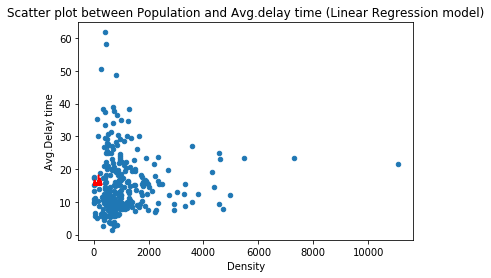

In [29]:
##PLOT DENSITY
c = pop_fac_fin['density']
d = pop_fac_fin['DELAY_AVG']
c1,d1=np.polyfit(c,d,1)

population = pop_fac_fin['density']

pred_avgdel2 = c1*population+d1
pop_fac_fin.plot.scatter(x = 'density', y = 'DELAY_AVG')
plt.title("Scatter plot between Population and Avg.delay time (Linear Regression model)")
plt.xlabel("Density")
plt.ylabel("Avg.Delay time")
plt.plot(pred_avgdel2,'-',color='red')

Unfortunately, from the graph above, denisty and average delay time do not follow a good correlation and neither does does our model being predictive. 

Next, we will check from the OLS regression model. 

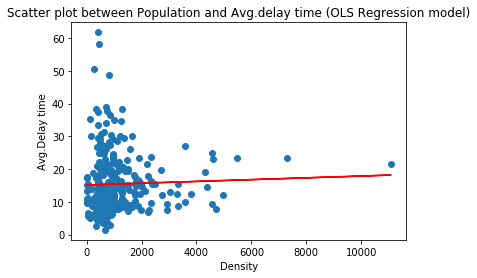

In [30]:
## PLOT POPULATION DENSITY
%matplotlib inline
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats

#creating data
x = np.array(pop_fac_fin['density'])
y = np.array(pop_fac_fin['DELAY_AVG'])

#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
def linefitline(b):
    return intercept + slope * b
line1 = linefitline(x)

#plot line
plt.scatter(x,y)
plt.plot(x,line1, c = 'r')
plt.title("Scatter plot between Population and Avg.delay time (OLS Regression model)")
plt.xlabel("Density")
plt.ylabel("Avg.Delay time")
plt.show()

The OLS model has a better predict line than the linear regression one. The scatter graph above shows that if the city has lower density of population then the chance that flight can be delayed increase. The predict line of density differs to population data with having slope going to upward. 

Now, we will find the p value and R-squared value for our OLS regression model.

In [31]:
## TO FIND P VALUE
out2, pred2 = patsy.dmatrices('DELAY_AVG~density',pop_fac_fin)
mod2 = sm.OLS(out2,pred2)
res2 = mod2.fit()

print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:              DELAY_AVG   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3429
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.559
Time:                        23:11:45   Log-Likelihood:                -1044.8
No. Observations:                 288   AIC:                             2094.
Df Residuals:                     286   BIC:                             2101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.1349      0.758     19.971      0.0

In [32]:
###TO CHECK R SQUARE####


import numpy

# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = numpy.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = numpy.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = numpy.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = numpy.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = numpy.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

x = pop_fac_fin['density']
y = pop_fac_fin['DELAY_AVG']

polyfit(x,y,3)

{'polynomial': [-1.1140994780482866e-11,
  2.557877200028333e-07,
  -0.0008402617960518418,
  15.86553272015568],
 'determination': 0.0036090680175188644}

The P-Value and R-squared value here, again, indicate that there is no relation between density and the average flight delay with p=0.56, R^2=0.0037. Our alpha value to determine the significancy is 0.05.  Now we confirm that there is no clear relationship between either city population or density and average delay time.

### 10.2.4) By Ranking

After we confirmed that there was no clear relationship between the population/density with average delay time, we focus on analyzing how could ranking influence the average delay time. From the correlations table, in the beginning, we noticed that city ranking might affect the performance of airlines.

We will now begin with visualizing data again from the scatter plot and create an OLS regression model to predict their relationship.

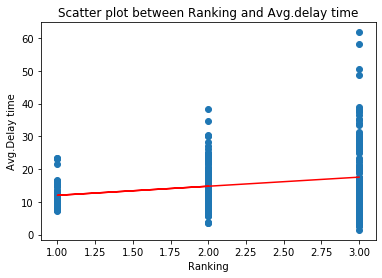

In [33]:
##PLOT RANKING
%matplotlib inline
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats

#creating data
x = np.array(pop_fac_fin['ranking'])
y = np.array(pop_fac_fin['DELAY_AVG'])

#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
def linefitline(b):
    return intercept + slope * b
line1 = linefitline(x)

#plot line
plt.scatter(x,y)
plt.plot(x,line1, c = 'r')
plt.title("Scatter plot between Ranking and Avg.delay time")
plt.xlabel("Ranking")
plt.ylabel("Avg.Delay time")
plt.show()

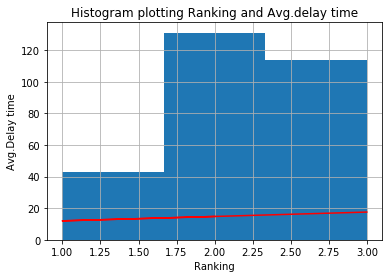

In [34]:
#plot line
# plt.scatter(x,y)
f1 = pop_fac_fin['ranking'].hist(bins=3)
plt.plot(x,line1, c = 'r')
plt.title("Histogram plotting Ranking and Avg.delay time")
plt.xlabel("Ranking")
plt.ylabel("Avg.Delay time")
plt.show()

Both scatter plot and histogram graphs above show that the more important city, the more flight delay. Predict line also goes upward, which may indicate that the city with higher rankings will be more likely to have a more top average delay time.

Next, we will check p-value for our prediction 

In [35]:
## TO GET P VALUE
out3, pred3 = patsy.dmatrices('DELAY_AVG~ranking',pop_fac_fin)
mod3 = sm.OLS(out3,pred3)
res3 = mod3.fit()

print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:              DELAY_AVG   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     13.42
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           0.000297
Time:                        23:11:45   Log-Likelihood:                -1038.3
No. Observations:                 288   AIC:                             2081.
Df Residuals:                     286   BIC:                             2088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2228      1.779      5.184      0.0

The P-value is 0.000 which is less than our alpha = 0.05. Thus we can say that there is significant relationship between the importance of cities and the average flight delay.

We did not calculate R^2 value for ranking data because it is already obvious that there is correlation by calculating P-value.

Therefore, we conclude from the above summary that city ranking is one factor that will influence airline's average delay time: the more influential the city is, the more likely it will have a higher average delay time. This outcome is quite reasonable since the more important city could have a higher number of airlines, and the possibility of having a delay is more significant.

# 11) Ethics & Privacy
Data Collection: <br>All the datasets we used for our study are publicly available. We gathered information from the United States Department of Transportation, simplemaps, and each airline company's website. The data by nature is open to the general public for use. There are no human subjects in our datasets, thus there is no problem with personal information leakage. Hence there shouldn't be any concern for consent or privacy. However, no data is perfect. Some potential biases in our data collection are that there could be some unreported causes that led to airline delays and our dataset might not be well rounded. For our project, we only collected data for 2019 and there are already 583,986 observations. Although we have enough observations for the purpose of our research, it could mean that the airline with the highest delays had a bad year in 2019 and were doing great regarding delays before 2019. We could collect more data from the past years, however, we think for airline delays, it changes as technology changes and it is best to have the most updated data for our project. Hence, we are overlooking these biases. 

Data Storage: <br>Our study does not contain any sensitive information so it can be used by the public and we do not have any plans to protect our data.

Data Analysis: <br>The datasets are basically objective and quantitative data. However, we only investigate domestic routes of airlines which may result in incomprehensiveness of our conclusion. Since all of our data are publicly accessible, there is no need to hide our analysis from the general public. If others could use our research for further research, they are more than welcome to do so. 

Privacy and ethical considerations are very important in regarding research because it can change the research result due to personal preferences or the research might cause negative impacts on some people’s lives. Hence, we have taken careful considerations regarding privacy and ethical considerations to ensure the validity and morality of our research. 


# 12) Conclusion & Discussion

Charging extra fees does not have a significant impact on airline delays. From above visualizations, we can see that there is a slightly positive correlation between price charged for the first checked baggage and delays. The p-value is up to 0.5, which is much greater than commonly used alpha value.(alpha = 0.05) So we fail to reject the null hypothesis and cannot tell the relationship between the first checked baggage fee and delays. However, the extra fee of the second checked baggage is negatively correlated with delays, and it supports our hypothesis that airlines charging extra money will tend to have fewer delays in some ways. The p-value is around 0.2, which is not small but still less than the p-value for the first checked baggage fee. So we conclude that the second checked baggage fee has a higher impact on delays compared to the first checked baggage fee.
<br>
<br>
We hypothesized that the population, density, and ranking of cities would affect the average delay. First, we checked the correlations between average delay time with these three aspects, and we found that there was no salient relationship between average delay with either population or density at first glance. However, by plotting the linear models, we noticed that cities with lower populations would have higher average delay time. The predicted line for density had a similar shape as populations’ but moving upward. Hence, cities with higher population density have higher average delay time. Plus, there could be a relationship between the delay time and city ranking. We further analyzed how the city rankings connected with average delay time. After creating a linear model and getting the summary results of the model fitting, we were excited to find out that the p-value was 0, which means that there is a close relationship between city rankings and the average delay time: The more important the city is, the more likely it will have a higher average delay time.
We had huge data loss in order to match the city names to the other dataset’s which includes information of population, density and city ranks. If we were able to maintain the original amount of the delay dataset, there might have been a better and clear relationship between delay vs. density or delay vs. population. Also, we were using a linear regression for our analysis. To improve our model, we could have used different statistical models such as exponential regression.
<br>
<br>
Although our results do not 100% support our hypothesis. Our group is still excited to see these results. It is strange to see that the second checked baggage fee would influence airliner delays as the first checked baggage fee has little to no effect. Even Though we were able to successfully support our hypotheses in the end, we suspect that the effect of the second checked baggage fee only contributes a small amount of influence towards airliner delays. Furthermore, it is interesting to see that less population has a direct correlation towards airline delays. As airliners are becoming a more important aspect of our lives, we are eager to see that cities with a denser population have less flight delays. Many of us travel between cities with a dense population more than those with less people. However, these findings are only valid due to our current technology. As the increase in technology, we suspect that these delays would decrease for cities with sparse population in the future since with better technology, airports should be able to handle delays a lot better. However, this is just another hypothesis we assume. Maybe we could conduct another experiment in the next couple years. 
